# 2D Triangular Meshes

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

import niceplots

plt.style.use(niceplots.get_style())
colors = niceplots.get_colors_list()


## Part 1: Node coordinates

In [ ]:
nodeCoordinates = np.loadtxt("meshes/blade0.node", skiprows=1)
print(nodeCoordinates[:10])


[[-27.000049    -1.237215  ]
 [-27.000049     0.46096024]
 [-27.000049     2.4792453 ]
 [-27.000049     4.87798158]
 [-27.000049     7.728885  ]
 [-23.6831689   -1.237215  ]
 [-23.35562958   0.68898222]
 [-22.96704546   2.97778661]
 [-22.50590944   5.69755045]
 [-21.95854535   8.92951054]]


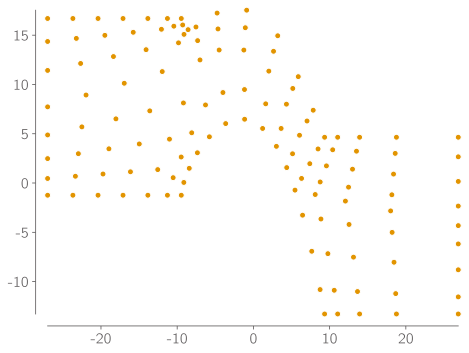

In [ ]:
fig, ax = plt.subplots()
ax.plot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], "o", clip_on=False, label="Nodes")
niceplots.adjust_spines(ax)


## Part 2: Node connectivity

The `.elem` file describes how the nodes are connected to form the triangular cells.
Each row in the file contains the indices of the three nodes that form a triangle.

In [ ]:
# MAKE SURE TO SUBTRACT 1 FROM THE ELEMENT CONNECTIVITY BECAUSE PYTHON IS 0 INDEXED
nodeConnectivity = np.loadtxt("meshes/blade0.elem", skiprows=1, dtype=int) - 1
print(nodeConnectivity[:10])


[[ 0  5  1]
 [ 5  6  1]
 [ 1  6  2]
 [ 6  7  2]
 [ 2  7  3]
 [ 7  8  3]
 [ 3  8  4]
 [ 8  9  4]
 [ 5 10  6]
 [10 11  6]]


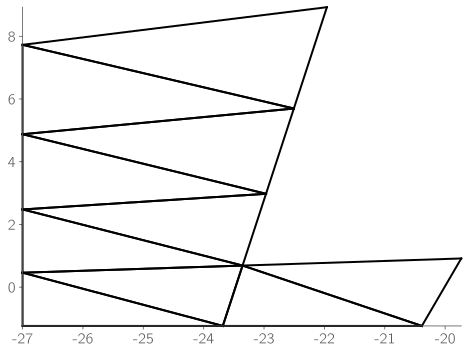

In [ ]:
# Naive plotting method
fig, ax = plt.subplots()
for cellNum in range(10):
    for edgeNum in range(3):
        node1 = nodeConnectivity[cellNum, edgeNum]
        node2 = nodeConnectivity[cellNum, (edgeNum + 1) % 3]
        ax.plot(
            [nodeCoordinates[node1, 0], nodeCoordinates[node2, 0]],
            [nodeCoordinates[node1, 1], nodeCoordinates[node2, 1]],
            "-",
            color="k",
            clip_on=False,
        )



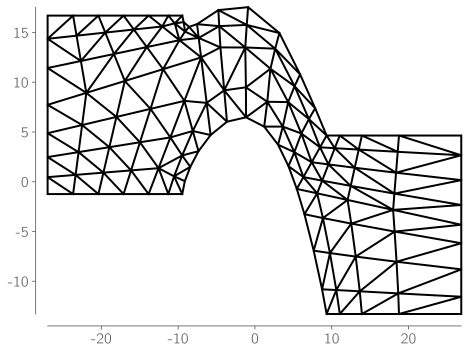

In [ ]:
# Smarter plotting method
fig, ax = plt.subplots()
ax.triplot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], nodeConnectivity, color="k", clip_on=False)
niceplots.adjust_spines(ax)


### Computing cell quantities

In [ ]:
def computeCellAreas(nodeCoordinates, nodeConnectivity):
    numCells = nodeConnectivity.shape[0]
    cellAreas = np.zeros(numCells)
    node1 = nodeConnectivity[:, 0]
    node2 = nodeConnectivity[:, 1]
    node3 = nodeConnectivity[:, 2]
    x1 = nodeCoordinates[node1, 0]
    x2 = nodeCoordinates[node2, 0]
    x3 = nodeCoordinates[node3, 0]
    y1 = nodeCoordinates[node1, 1]
    y2 = nodeCoordinates[node2, 1]
    y3 = nodeCoordinates[node3, 1]

    cellAreas[:] = np.abs(0.5 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)))

    return cellAreas

def computeCellCentroids(nodeCoordinates, nodeConnectivity):
    numCells = nodeConnectivity.shape[0]
    cellCentroids = np.zeros((numCells, 2))
    node1 = nodeConnectivity[:, 0]
    node2 = nodeConnectivity[:, 1]
    node3 = nodeConnectivity[:, 2]
    x1 = nodeCoordinates[node1, 0]
    x2 = nodeCoordinates[node2, 0]
    x3 = nodeCoordinates[node3, 0]
    y1 = nodeCoordinates[node1, 1]
    y2 = nodeCoordinates[node2, 1]
    y3 = nodeCoordinates[node3, 1]

    cellCentroids[:, 0] = (x1 + x2 + x3) / 3
    cellCentroids[:, 1] = (y1 + y2 + y3) / 3
    return cellCentroids

cellAreas = computeCellAreas(nodeCoordinates, nodeConnectivity)
cellCentroids = computeCellCentroids(nodeCoordinates, nodeConnectivity)


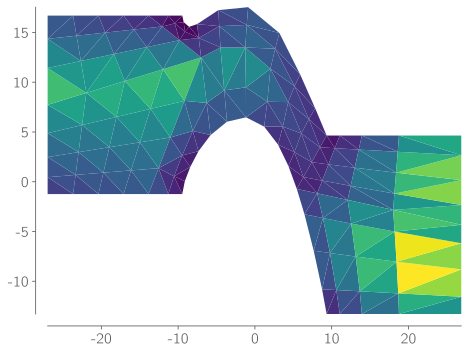

In [ ]:
fig, ax = plt.subplots()
ax.tripcolor(nodeCoordinates[:, 0], nodeCoordinates[:, 1], nodeConnectivity, cellAreas, cmap="viridis")
niceplots.adjust_spines(ax)


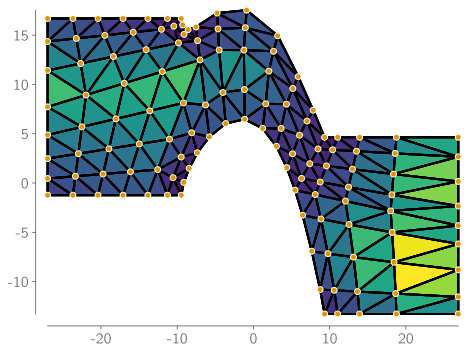

In [ ]:
ax.triplot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], nodeConnectivity, color="k", clip_on=False)
ax.plot(nodeCoordinates[:, 0], nodeCoordinates[:, 1], "o", clip_on=False, label="Nodes")
# fig


## Cell connectivity



Let's use the cell connectivity information to plot lines between a few of the cells and their neighbours.

In [ ]:
np.random.seed(0)

for ii in range(10):
    cellIndex = np.random.randint(0, cellConnectivity.shape[0])
    centroid = cellCentroids[cellIndex]
    for jj in range(3):
        neighborIndex = cellConnectivity[cellIndex, jj]
        if neighborIndex >= 0:
            neighborCentroid = cellCentroids[neighborIndex]
            ax.plot([thisCentroid[0], neighborCentroid[0]],
                     [thisCentroid[1], neighborCentroid[1]],
                     'r-o')
fig
